In [241]:
#importing libraries which are all requried

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [196]:
#reading the dataset and checking the first five rows

ln = pd.read_csv("loan.csv")

print(ln.head())

#checking the count of rows and columns)
ln.shape


        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               

(39717, 111)

### Data cleaning

Clearing unwanted columns,rows and replacing 0/NaN to most used values or values which don't affect much

In [197]:
# check for columns which having null-values and also shows the count 
ln.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [198]:
# Drop all the columns which are of totally none
print("Shape before droping null value columns")

print(ln.shape)

ln.dropna(axis='columns', how='all', thresh=None, subset=None, inplace=True)

print("Shape after droping null value columns")

print(ln.shape)

Shape before droping null value columns
(39717, 111)
Shape after droping null value columns
(39717, 57)


In [199]:
# check for columns which having null-values and also shows the count 
ln.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [200]:
#Checking for NaN value and remove those rows for emp_length, emp_title

print("Shape before droping null rows for emp_length and emp_title ")

print(ln.shape)


ln = ln[~ln.emp_length.isnull()]
ln = ln[~ln.emp_title.isnull()]


# Drop all the columns which are of totally none
print("Shape after droping null rows for emp_length and emp_title")

print(ln.shape)

Shape before droping null rows for emp_length and emp_title 
(39717, 57)
Shape after droping null rows for emp_length and emp_title
(37202, 57)


In [201]:
#Checking for NaN value and remove those rows for title

print("Shape before droping null rows for title ")

print(ln.shape)

ln = ln[~ln.title.isnull()]

print("Shape after droping null rows for title")

print(ln.shape)

Shape before droping null rows for title 
(37202, 57)
Shape after droping null rows for title
(37193, 57)


In [202]:
# check for columns which having null-values and also shows the count 
ln.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                         0
emp_length                        0
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12063
purpose                           0
title                             0
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [203]:
#check for desc values to judge its needed or not
ln['desc']

1          Borrower added on 12/22/11 > I plan to use t...
3          Borrower added on 12/21/11 > to pay for prop...
4          Borrower added on 12/21/11 > I plan on combi...
5                                                      NaN
6          Borrower added on 12/18/11 > I am planning o...
                               ...                        
39710                                                  NaN
39711    I'd like to shift some credit card debt so it ...
39712    Our current gutter system on our home is old a...
39713    The rate of interest and fees incurred by carr...
39716    I plan to consolidate over $7,000 of debt: a c...
Name: desc, Length: 37193, dtype: object

In [204]:
#by seeing desc values its not much need so dropping it from table
ln = ln.drop(['desc'], axis = 1)

print("Shape after desc column dropped")

print(ln.shape)

Shape after desc column dropped
(37193, 56)


In [205]:
#check for mths_since_last_delinq,mths_since_last_record and replace with 0.0
ln['mths_since_last_delinq'] = ln['mths_since_last_delinq'].fillna(0.0)
ln['mths_since_last_record'] = ln['mths_since_last_record'].fillna(0.0)

In [206]:
# check for columns which having null-values and also shows the count
ln.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                         0
emp_length                        0
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
purpose                           0
title                             0
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths                    0
mths_since_last_delinq      

In [207]:
#check for revol_util removing % at last and giving 
ln['revol_util']

ln['revol_util'] = ln['revol_util'].str.rstrip('%')

#we have already 883 rows with 0 so better to remove null value row

ln = ln[~ln.revol_util.isnull()]

In [208]:
#check for last_pymnt_d some dates are missing so better to remove rows
ln['last_pymnt_d']

ln = ln[~ln.last_pymnt_d.isnull()]

print("Shape after last_pymnt_d column dropped")

print(ln.shape)

#check for next_pymnt_d multiple dates are missing so better to remove column
ln['next_pymnt_d']

ln = ln.drop(['next_pymnt_d'], axis = 1)

print("Shape after next_pymnt_d column dropped")

print(ln.shape)

Shape after last_pymnt_d column dropped
(37087, 56)
Shape after next_pymnt_d column dropped
(37087, 55)


In [209]:
#check for zip_code multiple diffrent zip_code are present so better to remove the column.
ln['zip_code']

ln = ln.drop(['zip_code'], axis = 1)

print("Shape after zip_code column dropped")

print(ln.shape)

Shape after zip_code column dropped
(37087, 54)


In [210]:
#check for collections_12_mths_ex_med, all of the collections_12_mths_ex_med contains value 0.0 so better to assign null values to 0.0
ln['collections_12_mths_ex_med'].value_counts()

ln['collections_12_mths_ex_med'] = ln['collections_12_mths_ex_med'].fillna(0.0)

#check for chargeoff_within_12_mths, all of the chargeoff_within_12_mths contains value 0.0 so better to assign null values to 0.0
ln['chargeoff_within_12_mths'].value_counts()

ln['chargeoff_within_12_mths'] = ln['chargeoff_within_12_mths'].fillna(0.0)

#check for tax_liens, all of the tax_liens contains value 0.0 so better to assign null values to 0.0
ln['tax_liens'].value_counts()

ln['tax_liens'] = ln['tax_liens'].fillna(0.0)

#check for pub_rec_bankruptcies, all of the pub_rec_bankruptcies contains value 0.0 so better to assign null values to 0.0
ln['pub_rec_bankruptcies'].value_counts()

ln['pub_rec_bankruptcies'] = ln['pub_rec_bankruptcies'].fillna(0.0)

In [211]:
#check for pub_rec_bankruptcies, all of the tax_liens contains value 0.0 so better to assign null values to 0.0
ln['pub_rec_bankruptcies'].describe()

count    37087.000000
mean         0.040688
std          0.198522
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: pub_rec_bankruptcies, dtype: float64

In [212]:
# check for columns which having null-values and also shows the count
ln.isnull().sum()

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
url                           0
purpose                       0
title                         0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
mths_since_last_delinq        0
mths_since_last_record        0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_ut

By seeing the above values null-values are cleaned.

In [213]:
#Check any column need type converstion for any analysis.
ln.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37087 entries, 1 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          37087 non-null  int64  
 1   member_id                   37087 non-null  int64  
 2   loan_amnt                   37087 non-null  int64  
 3   funded_amnt                 37087 non-null  int64  
 4   funded_amnt_inv             37087 non-null  float64
 5   term                        37087 non-null  object 
 6   int_rate                    37087 non-null  object 
 7   installment                 37087 non-null  float64
 8   grade                       37087 non-null  object 
 9   sub_grade                   37087 non-null  object 
 10  emp_title                   37087 non-null  object 
 11  emp_length                  37087 non-null  object 
 12  home_ownership              37087 non-null  object 
 13  annual_inc                  370

In [214]:
#we could see if int_rate has been float hat will be helpfull for analysis
ln['int_rate']

ln['int_rate'] = ln['int_rate'].str.rstrip('%')
ln.int_rate = ln.int_rate.astype("float64")

In [277]:
#ensure int_rate after changes been done
print(ln.int_rate)

1        15.27
3        13.49
4        12.69
5         7.90
6        15.96
         ...  
39710     7.43
39711     8.70
39712     8.07
39713    10.28
39716    13.75
Name: int_rate, Length: 35101, dtype: float64


In [215]:
#Check emp_length and extract just the numerical value and convert into int64
ln['emp_length']=ln.emp_length.str.extract('(\d+)')
ln.emp_length = ln.emp_length.astype("int64")

In [216]:
#ensure emp_length after changes been done
print(ln.emp_length)

1         1
3        10
4         1
5         3
6         8
         ..
39710     1
39711     5
39712     4
39713     3
39716     1
Name: emp_length, Length: 37087, dtype: int64


In [218]:
#we could see if revol_util has been float hat will be helpfull for analysis.
ln.revol_util = ln.revol_util.astype("float64")
print(ln.revol_util)

1         9.4
3        21.0
4        53.9
5        28.3
6        85.6
         ... 
39710     0.6
39711    23.0
39712    13.1
39713    26.9
39716    51.5
Name: revol_util, Length: 37087, dtype: float64


# Univariate analysis

Univariate analysis is the way to analyse data with one variable

count    3.708700e+04
mean     6.930844e+04
std      6.423179e+04
min      4.000000e+03
25%      4.167600e+04
50%      6.000000e+04
75%      8.300000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64


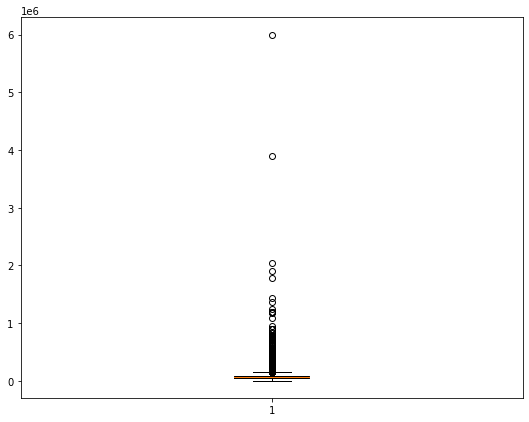

In [220]:
#Create a box plot for the annual_inc column and remove outliers
print(ln['annual_inc'].describe())
plt.figure(figsize = [9,7])
plt.boxplot(ln.annual_inc)
plt.show()

In [221]:
#we're removing outliers with condition quantile more than 0.95
ln = ln[ln["annual_inc"] < ln["annual_inc"].quantile(0.95)]

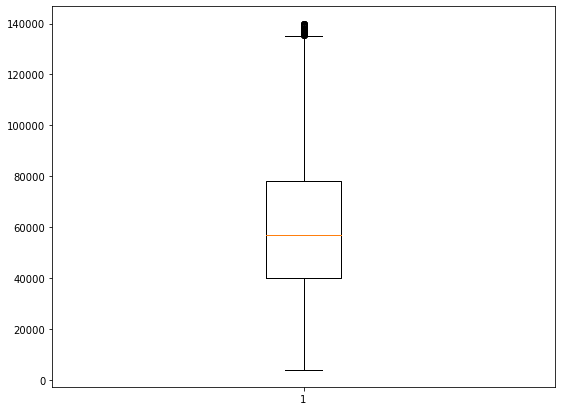

count     35101.000000
mean      61216.318919
std       27029.383902
min        4000.000000
25%       40000.000000
50%       57000.000000
75%       78000.000000
max      139992.000000
Name: annual_inc, dtype: float64

In [222]:
#After removing outliers we're analysing annual income with box plot
plt.figure(figsize = [9,7])
plt.boxplot(ln.annual_inc)
plt.show()
ln['annual_inc'].describe()

Observation:
After removing outliers we could see 50 percentile is around 57000.

Text(0.5, 1.0, 'funded_amnt_inv')

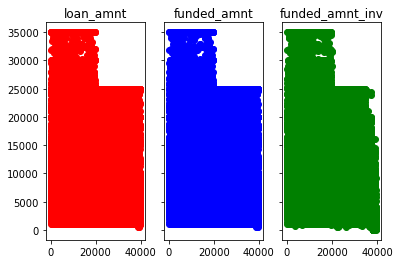

In [232]:
#Using scatter plots, we can analyse loan_amnt,funded_amnt,funded_amnt_inv
fig, ax = plt.subplots(ncols=3, sharey=True)

loan_amnt = ax[0].scatter(ln.index,ln.loan_amnt)
loan_amnt.set_label("loan_amnt")
loan_amnt.set_color("red")
ax[0].set_title('loan_amnt')

funded_amnt = ax[1].scatter(ln.index,ln.funded_amnt)
funded_amnt.set_label("funded_amnt")
funded_amnt.set_color("blue")
ax[1].set_title('funded_amnt')

funded_amnt_inv = ax[2].scatter(ln.index,ln.funded_amnt_inv)
funded_amnt_inv.set_label("funded_amnt_inv")
funded_amnt_inv.set_color("green")
ax[2].set_title('funded_amnt_inv')

Observation:
From the scatter chart, we could observe that loan amount, funded amount and funded amount invested are having similar propotion.

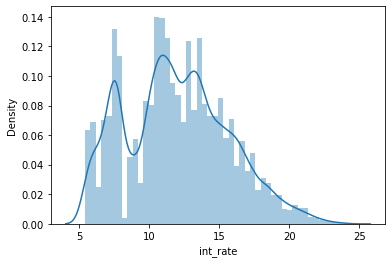

In [243]:
#distplot to check rate of interest with respect to density
sns.distplot(ln.int_rate)
plt.show()

Observation:
Here displot show that most of the Interest Rates on loans are between 10 - 15%

# Bivariate analysis

Bivariate analysis is the way to analyse data with two variables

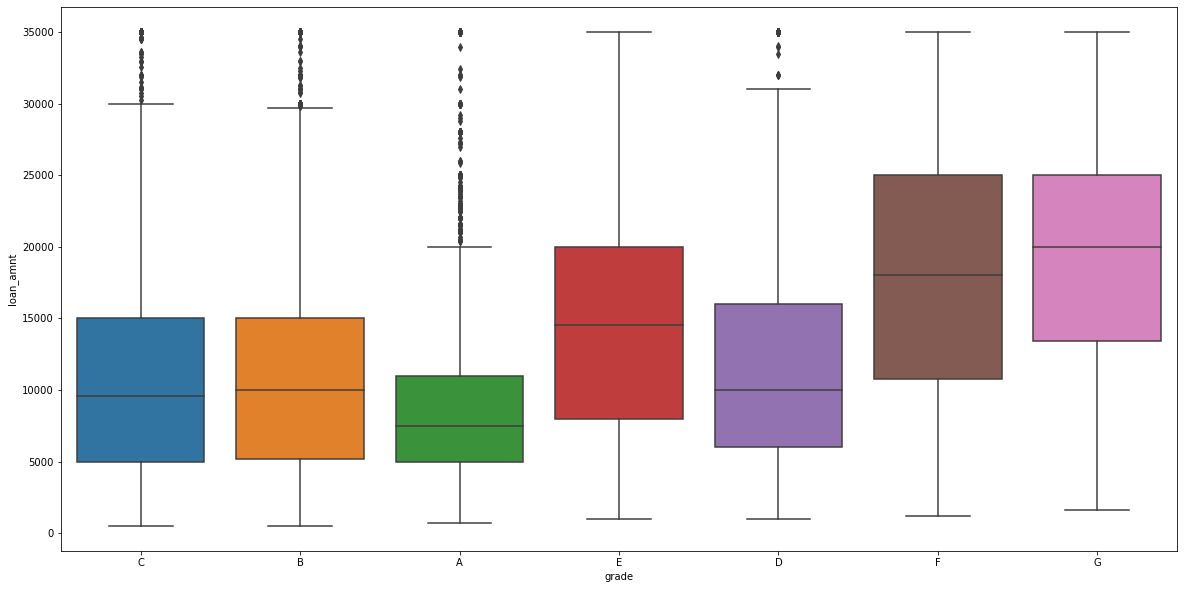

In [256]:
#comparing grade and loan_amnt with help of boxplot

plt.figure(figsize = [20,10])
sns.boxplot(ln.grade,ln.loan_amnt)

plt.show()

Observation:
Lower grade like g and f are generally appear for higher loan amount

In [264]:
# metrics to derive Chargedoff_Ratio

ln_pur_loans = loan.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
ln_pur_loans['SUM_of purpose'] = ln_pur_loans['Charged Off'] + ln_pur_loans['Current'] + ln_pur_loans['Fully Paid'] 
ln_pur_loans['Chargedoff_Ratio'] = ln_pur_loans['Charged Off'] / ln_pur_loans['SUM_of purpose']
ln_pur_loans.sort_values('Chargedoff_Ratio', ascending=False)

loan_status,purpose,Charged Off,Current,Fully Paid,SUM_of purpose,Chargedoff_Ratio
11,small_business,475.0,74.0,1279.0,1828.0,0.259847
10,renewable_energy,19.0,1.0,83.0,103.0,0.184466
3,educational,56.0,0.0,269.0,325.0,0.172308
9,other,633.0,128.0,3232.0,3993.0,0.158527
8,moving,92.0,7.0,484.0,583.0,0.157804
5,house,59.0,14.0,308.0,381.0,0.154856
7,medical,106.0,12.0,575.0,693.0,0.152958
2,debt_consolidation,2767.0,586.0,15288.0,18641.0,0.148436
12,vacation,53.0,6.0,322.0,381.0,0.139108
4,home_improvement,347.0,101.0,2528.0,2976.0,0.116599


<function matplotlib.pyplot.show(close=None, block=None)>

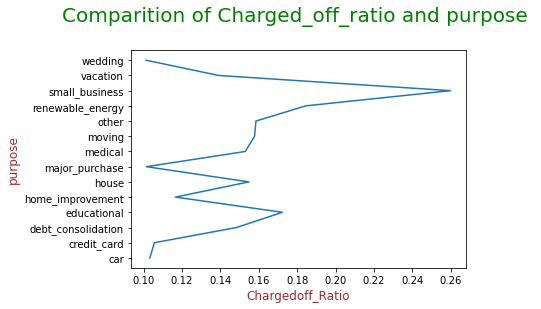

In [268]:
#Linechart which compares purpose with chargedoff_ratio
plt.plot(ln_pur_loans.Chargedoff_Ratio,ln_pur_loans.purpose)

# Adding and formatting title
plt.title("Comparition of Charged_off_ratio and purpose \n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

# Labeling Axes
plt.xlabel("Chargedoff_Ratio", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("purpose", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'} )

plt.show

Observations:
Chargedoff ratio is higher for small_business so risk for |providing loan to small business is higher.

# Multivariate analysis

<AxesSubplot:>

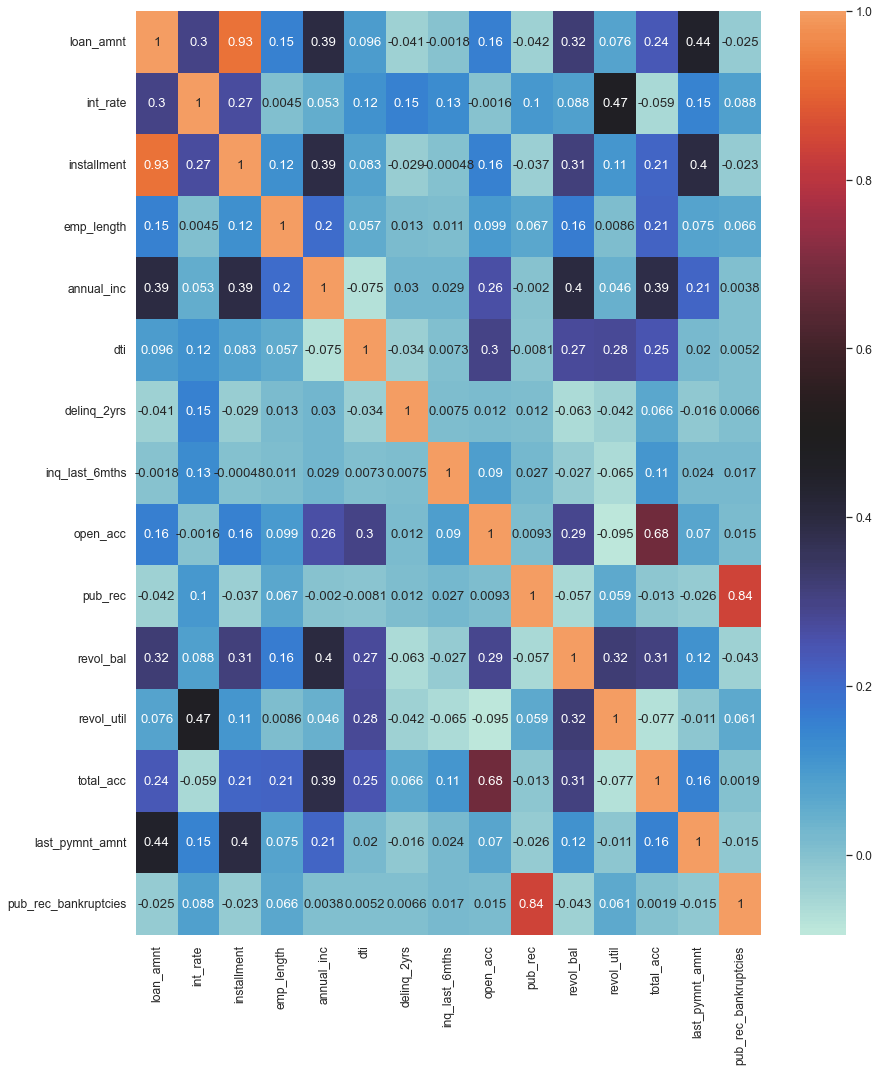

In [276]:
# Analysing multiple float values with help of heat map
plt.figure(figsize=(14,17))
cont_var= ['loan_amnt', 'int_rate', 'installment','emp_length', 'annual_inc','dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util','total_acc', 'last_pymnt_amnt', 'pub_rec_bankruptcies']
corr = ln[cont_var].corr()
sns.heatmap(corr, annot=True, center=0.5)

Observation:
- on comparing int_rate with revol_util the corr value is around 0.4 therefore investors/bank can gain more profit based on high interest rate.
- on correlating the last_pymnt_amnt with pub_rec_bankruptcies, we can say if last payment amount is low then there is high probability of bankruptcies.
- as expected when annual income increases then loan amount is also increasing.
- on seeing heat map, it is clear that whenever the loan amount is higher then number of installment is also in propotion.
- pub_rec is directly propotional to pub_rec_bankruptcies with corr value of 0.84, if public record is higher then risk of defaulters will also be higher.